# ANALISIS TEXT RANK

In [39]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import spacy
#importamos la libreria que realizara los grupos
import matplotlib.pyplot as plt
%matplotlib inline 
datos = pd.read_csv('DebateFinal.csv', header = 0)

In [7]:
tweets = datos['tweet']
tweets = list(tweets.ix[0:2999])
print(len(tweets))
#reviso el tipo de dato de un tweet
print(type(tweets[0]))

3000
<class 'str'>


In [8]:

print(tweets[0])
print(tweets[1])
nlp = spacy.load('es')

#LeySeca #DebateFinal #ColombiaDecide #EleccionesColombia #Elecciones2018 #EleccionesPresidenciales2018 Huila: la jornada en cifrasPuestos de votación 215Mesas 2.178Personas habilitadas para sufragar 817.464Jurados de votación 14.475 Y más en ....  https://goo.gl/JDxHHG 
Retweeted Lorena <Emoji: Victory hand><Emoji: Victory hand> (@lorenita_sua):Si Duque va a desmantelar el crimen organizado, va acabar entonces con el Centro Democrático? #DebateFinal


## tokenizamos

In [9]:
NroTweets = len(tweets)
print(NroTweets)
#prueba = 10
Msimilaridad = np.zeros((NroTweets, NroTweets))
twToken = [nlp(tw) for tw in tweets]

3000


## Creamos matriz de similaridad

In [10]:
for i in range(NroTweets):
    for j in range(NroTweets):
        Msimilaridad[i][j] = twToken[i].similarity(twToken[j])


In [11]:
print(Msimilaridad)

[[1.         0.64024656 0.6931933  ... 0.67553587 0.48443202 0.62138811]
 [0.64024656 1.         0.75335483 ... 0.54453097 0.59233268 0.69839828]
 [0.6931933  0.75335483 1.         ... 0.66107627 0.52927477 0.73747574]
 ...
 [0.67553587 0.54453097 0.66107627 ... 1.         0.57266873 0.77232728]
 [0.48443202 0.59233268 0.52927477 ... 0.57266873 1.         0.65248724]
 [0.62138811 0.69839828 0.73747574 ... 0.77232728 0.65248724 1.        ]]


## Creamos grupos para analisis de page rank

In [12]:
Grupos = {}
for tw in range(NroTweets):
    Grupos[tweets[tw]] = []
    for cmptw in range(NroTweets):
        if Msimilaridad[tw][cmptw] >= 0.90:
            #if tw != cmptw:
            Grupos[tweets[tw]].append(tweets[cmptw])
            

In [13]:
cant = 0
for tw in range(NroTweets):
    if len(Grupos[tweets[tw]]) > 0:
        cant += 1

print(cant)


3000


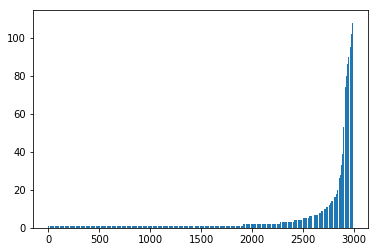

In [14]:
grordenado = sorted(Grupos.values(), key = lambda k : len(k))
tambar = [len(gr) for gr in grordenado]
X = range(len(tambar))
plt.bar(X, tambar, label = 'Grupos basicos')
plt.show()


In [16]:
#obtener los grupos que tengan mas de 10 tweets

similares = []
for e in grordenado:
    if len(e) >= 50:
        similares.append(e)
#print(tambar)
print(len(similares))

92


In [28]:
parrafos = []
for twts in similares:
    parrafos.append(" ".join(twts))


In [31]:
print(len(parrafos))

92


In [37]:
from gensim.summarization import keywords
kwords = []
for p in parrafos:
    kwords.append(keywords(p).split('\n')[0:5])



In [38]:
print(kwords)

[['emoji', 'debatefinal', 'que', 'https', 'http'], ['debatefinal', 'https', 'http', 'pic', 'colombiadecide'], ['emoji', 'debatefinal', 'https', 'http', 'pic'], ['debatefinal', 'https', 'http', 'colombiadecide', 'صلاله_الان'], ['debatefinal', 'https', 'http', 'pic', 'emoji'], ['debatefinal', 'colombiadecide', 'pic', 'https', 'http'], ['debatefinal', 'emoji', 'https', 'http', 'saafniyatsahivikas'], ['debatefinal', 'https', 'http', 'saafniyatsahivikas', 'pic'], ['debatefinal', 'https', 'http', 'saafniyatsahivikas', 'pic'], ['debatefinal', 'https', 'http', 'pic', 'colombiadecide'], ['debatefinal', 'https', 'http', 'pic', 'colombiadecide'], ['debatefinal', 'colombiadecide', 'https', 'http', 'pic'], ['debatefinal', 'colombiadecide', 'pic', 'https', 'http'], ['debatefinal', 'https', 'http', 'saafniyatsahivikas', 'pic'], ['debatefinal', 'https', 'http', 'saafniyatsahivikas', 'colombiadecide'], ['debatefinal', 'https', 'http', 'saafniyatsahivikas', 'colombiadecide'], ['debatefinal', 'https', 'h